<a href="https://colab.research.google.com/github/yeho/scikit-learn-AI/blob/master/Rendimiento_sistemas_paralelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANÁLISIS EXPLORATORIO DE DATOS - RENDIMIENTO DE SISTEMAS PARALELOS

1. INFORMACIÓN GENERAL DEL DATASET
--------------------------------------------------------------------------------
Dimensiones: 100 filas × 7 columnas

Variables del dataset:
  - tareas
  - tiempo_ejecucion_ms
  - latencia_ms
  - uso_cpu_%
  - uso_gpu_%
  - throughput_tareas_s
  - num_hilos

Tipos de datos:
tareas                   int64
tiempo_ejecucion_ms    float64
latencia_ms            float64
uso_cpu_%              float64
uso_gpu_%              float64
throughput_tareas_s    float64
num_hilos                int64
dtype: object

Valores nulos:
tareas                 0
tiempo_ejecucion_ms    0
latencia_ms            0
uso_cpu_%              0
uso_gpu_%              0
throughput_tareas_s    0
num_hilos              0
dtype: int64


2. ESTADÍSTICAS DESCRIPTIVAS
--------------------------------------------------------------------------------
           tareas  tiempo_ejecucion_ms  latencia_ms  uso_cpu_%   uso_gpu_% 

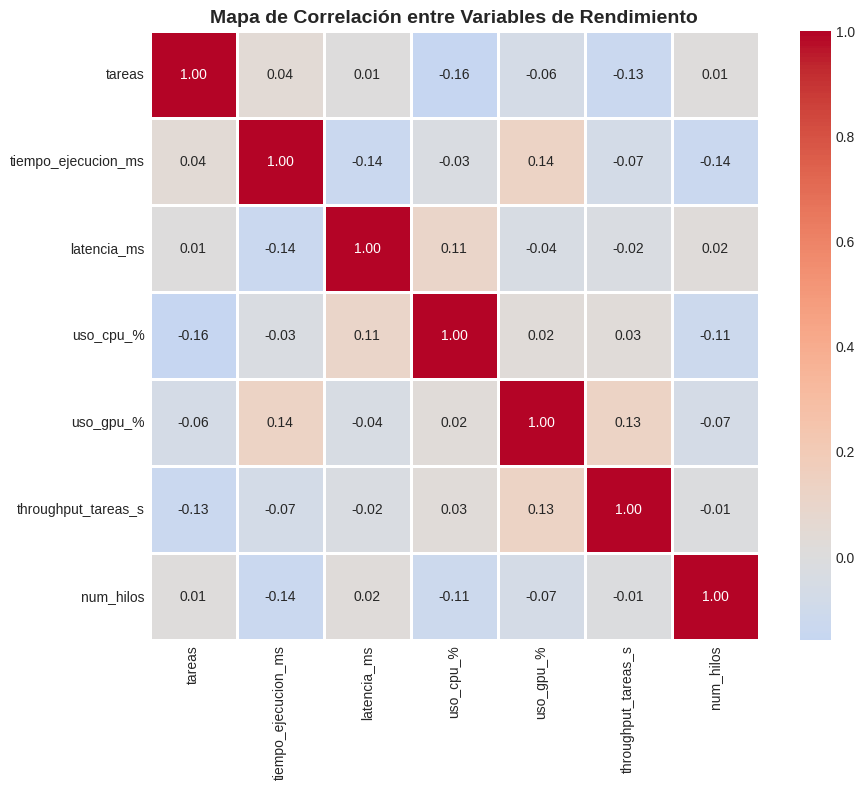

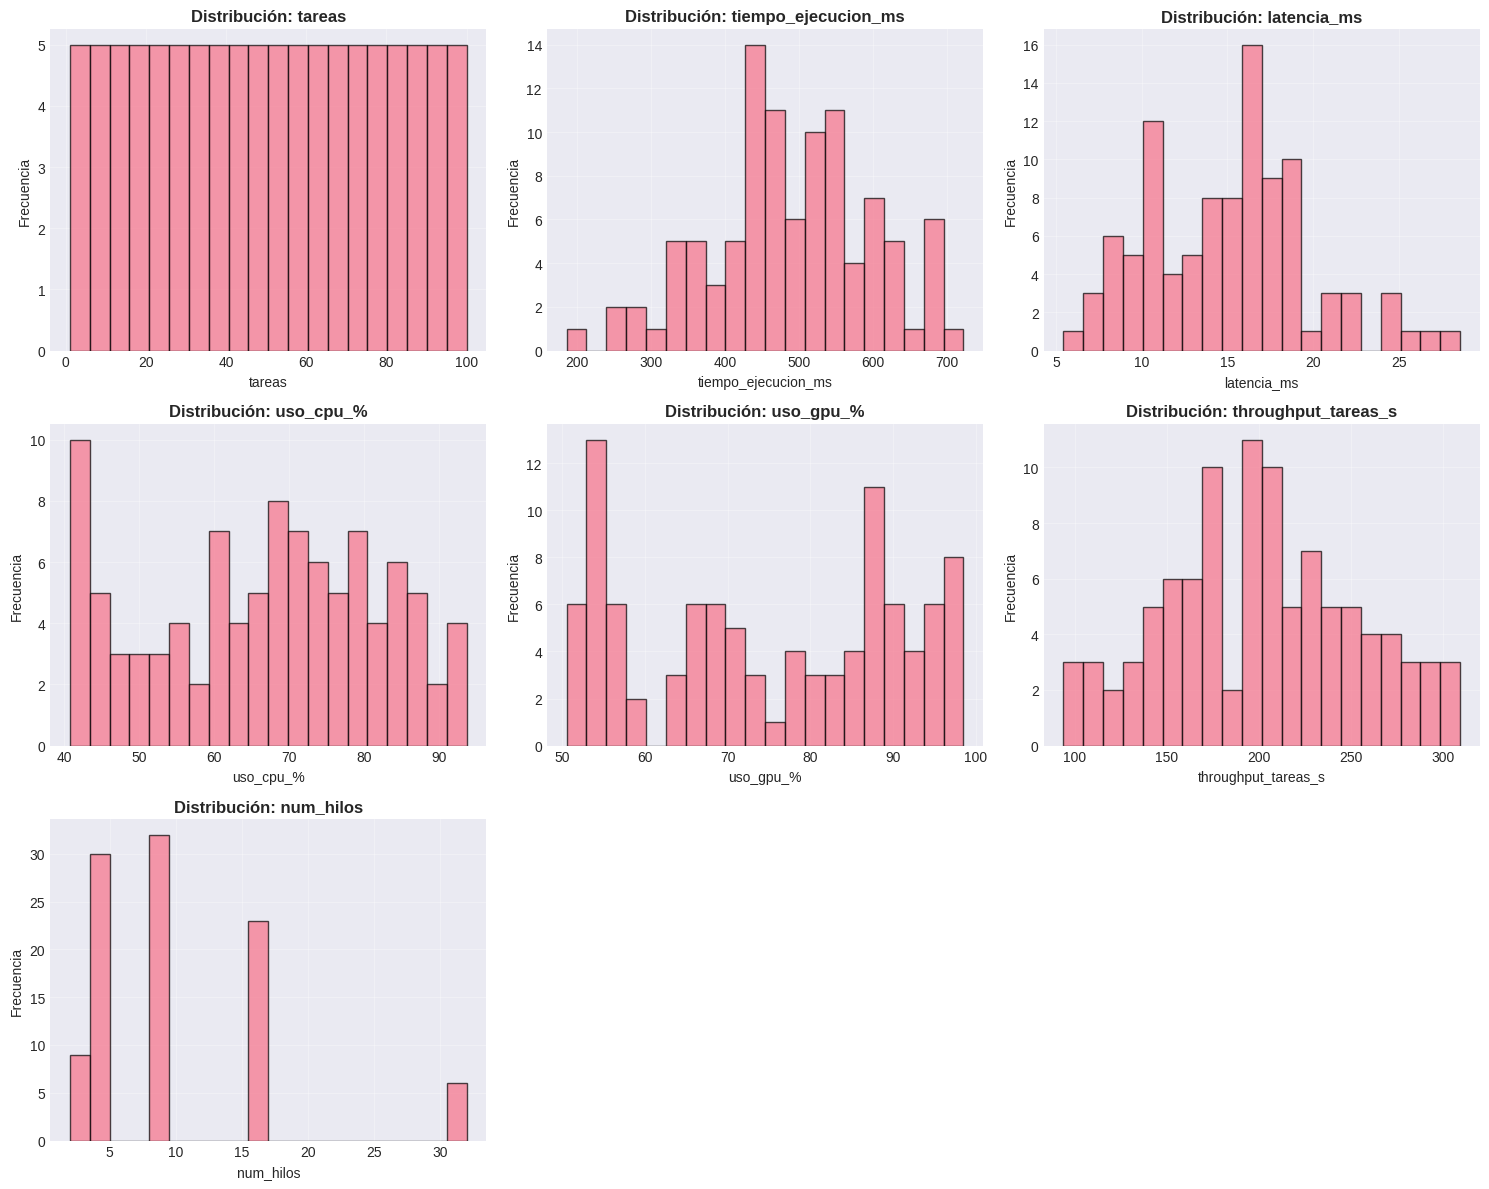

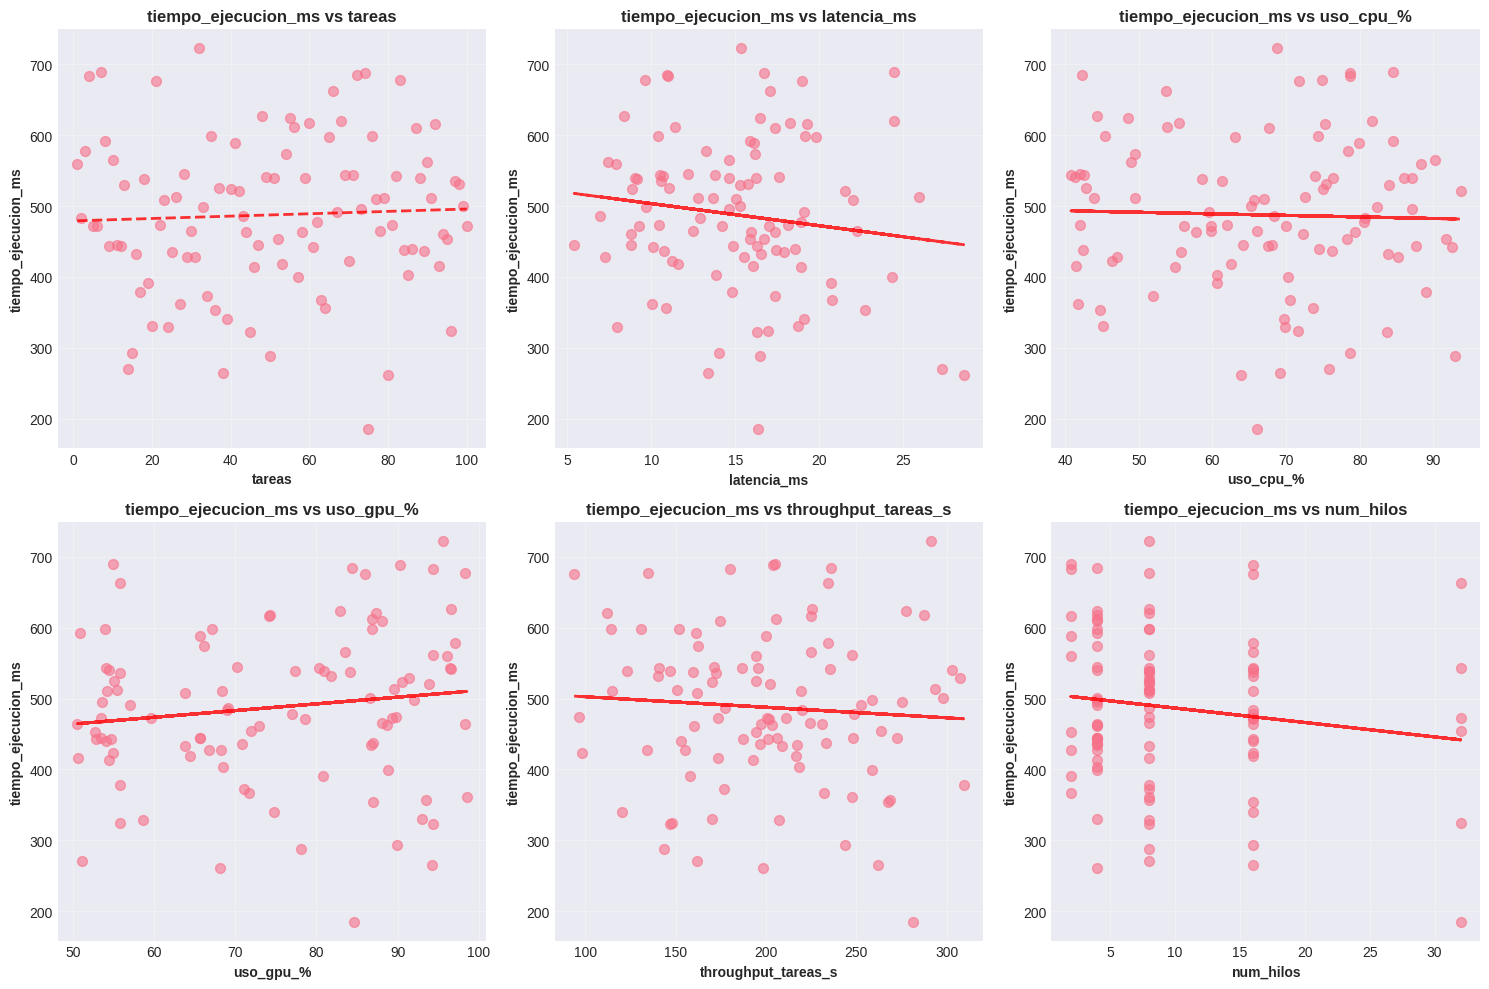

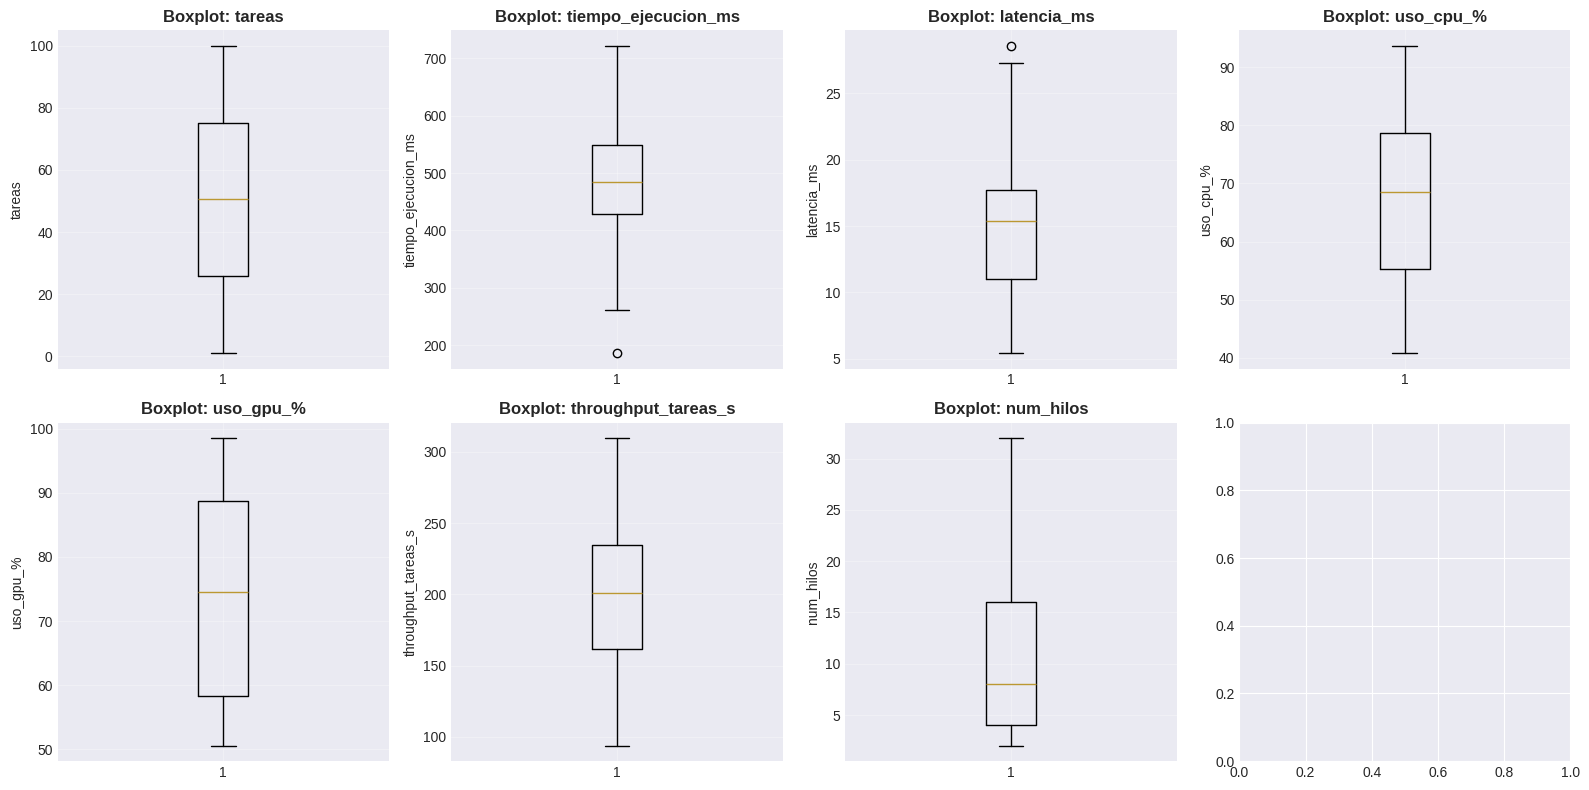



4. ANÁLISIS POR NÚMERO DE HILOS
--------------------------------------------------------------------------------
                 mean         std  count
num_hilos                               
2          530.641111  123.848695      9
4          489.672333   94.419901     30
8          489.265312  111.065275     32
16         477.806957  104.454660     23
32         440.308333  167.085851      6


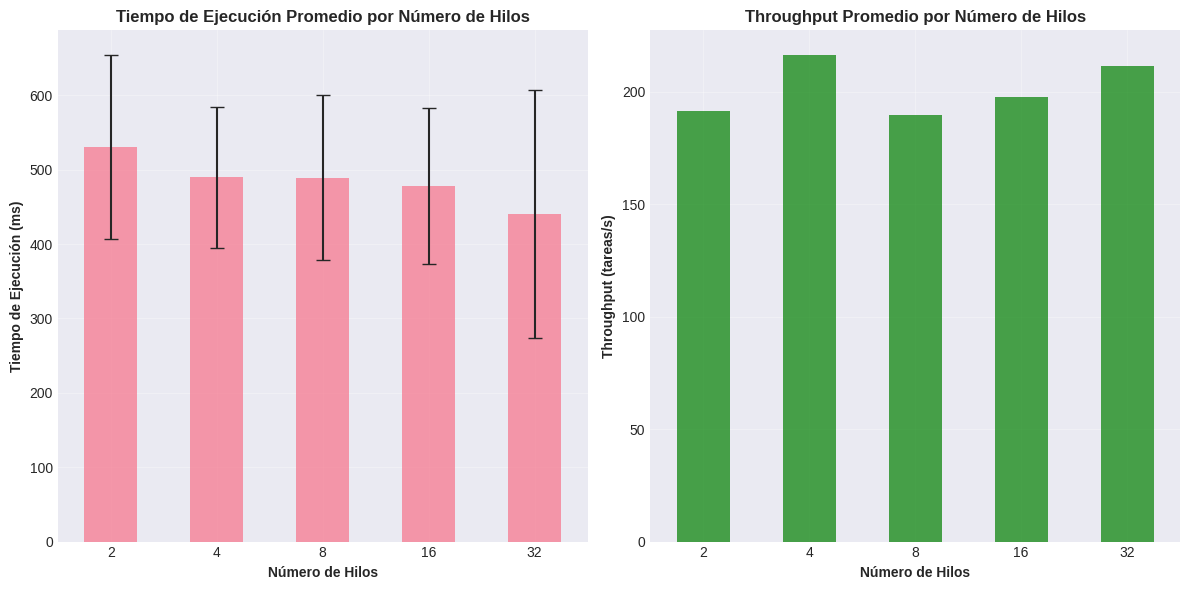



5. PRUEBAS DE NORMALIDAD (Shapiro-Wilk)
--------------------------------------------------------------------------------
tareas                    - Estadístico: 0.9547, p-valor: 0.0017
  → NO distribución normal (p ≤ 0.05)
tiempo_ejecucion_ms       - Estadístico: 0.9899, p-valor: 0.6552
  → Distribución normal (p > 0.05)
latencia_ms               - Estadístico: 0.9775, p-valor: 0.0851
  → Distribución normal (p > 0.05)
uso_cpu_%                 - Estadístico: 0.9551, p-valor: 0.0018
  → NO distribución normal (p ≤ 0.05)
uso_gpu_%                 - Estadístico: 0.9148, p-valor: 0.0000
  → NO distribución normal (p ≤ 0.05)
throughput_tareas_s       - Estadístico: 0.9864, p-valor: 0.3963
  → Distribución normal (p > 0.05)
num_hilos                 - Estadístico: 0.7704, p-valor: 0.0000
  → NO distribución normal (p ≤ 0.05)


6. ANÁLISIS DE VARIANZA
--------------------------------------------------------------------------------
Variable                         Varianza  Desv. Estándar 

In [9]:
"""
Análisis Exploratorio de Datos de Rendimiento en Sistemas Paralelos
MIA102 - Programación Paralela
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Cargar datos
df = pd.read_csv('datos_sinteticos_rendimiento.csv')
print("="*80)
print("ANÁLISIS EXPLORATORIO DE DATOS - RENDIMIENTO DE SISTEMAS PARALELOS")
print("="*80)

#Información general del dataset
print("\n1. INFORMACIÓN GENERAL DEL DATASET")
print("-"*80)
print(f"Dimensiones: {df.shape[0]} filas × {df.shape[1]} columnas")
print(f"\nVariables del dataset:")
for col in df.columns:
    print(f"  - {col}")
print(f"\nTipos de datos:")
print(df.dtypes)
print(f"\nValores nulos:")
print(df.isnull().sum())

# Estadísticas descriptivas
print("\n\n2. ESTADÍSTICAS DESCRIPTIVAS")
print("-"*80)
print(df.describe())

# Guardar estadísticas descriptivas
stats_desc = df.describe()
stats_desc.to_csv('estadisticas_descriptivas.csv')

# Análisis de correlación
print("\n\n3. MATRIZ DE CORRELACIÓN")
print("-"*80)
correlation_matrix = df.corr()
print(correlation_matrix)

# Guardar matriz de correlación
correlation_matrix.to_csv('matriz_correlacion.csv')

# Identificar correlaciones más fuertes con tiempo_ejecucion_ms
print("\n\nCorrelaciones con tiempo_ejecucion_ms (variable objetivo):")
correlations_with_target = correlation_matrix['tiempo_ejecucion_ms'].sort_values(ascending=False)
print(correlations_with_target)

# Mapa de calor de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1)
plt.title('Mapa de Correlación entre Variables de Rendimiento', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()
plt.close()

# Distribuciones de variables
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()
for idx, col in enumerate(df.columns):
    if idx < len(axes):
        axes[idx].hist(df[col], bins=20, edgecolor='black', alpha=0.7)
        axes[idx].set_title(f'Distribución: {col}', fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frecuencia')
        axes[idx].grid(True, alpha=0.3)

# Ocultar ejes no utilizados
for idx in range(len(df.columns), len(axes)):
    axes[idx].axis('off')
plt.tight_layout()
plt.show()
plt.close()

# Diagramas de dispersión con variable objetivo
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()
variables_predictoras = [col for col in df.columns if col != 'tiempo_ejecucion_ms']
for idx, var in enumerate(variables_predictoras):
    if idx < len(axes):
        axes[idx].scatter(df[var], df['tiempo_ejecucion_ms'], alpha=0.6, s=50)
        axes[idx].set_xlabel(var, fontweight='bold')
        axes[idx].set_ylabel('tiempo_ejecucion_ms', fontweight='bold')
        axes[idx].set_title(f'tiempo_ejecucion_ms vs {var}', fontweight='bold')
        axes[idx].grid(True, alpha=0.3)

        # Línea de tendencia
        z = np.polyfit(df[var], df['tiempo_ejecucion_ms'], 1)
        p = np.poly1d(z)
        axes[idx].plot(df[var], p(df[var]), "r--", alpha=0.8, linewidth=2)
plt.tight_layout()
plt.show()
plt.close()

# Boxplots para detectar outliers
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()
for idx, col in enumerate(df.columns):
    if idx < len(axes):
        axes[idx].boxplot(df[col], vert=True)
        axes[idx].set_title(f'Boxplot: {col}', fontweight='bold')
        axes[idx].set_ylabel(col)
        axes[idx].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

# Análisis por número de hilos
plt.figure(figsize=(12, 6))

# Agrupar por número de hilos
hilos_grupos = df.groupby('num_hilos')['tiempo_ejecucion_ms'].agg(['mean', 'std', 'count'])
print("\n\n4. ANÁLISIS POR NÚMERO DE HILOS")
print("-"*80)
print(hilos_grupos)

# Gráfico de barras con error
plt.subplot(1, 2, 1)
hilos_grupos['mean'].plot(kind='bar', yerr=hilos_grupos['std'], capsize=5, alpha=0.7)
plt.title('Tiempo de Ejecución Promedio por Número de Hilos', fontweight='bold')
plt.xlabel('Número de Hilos', fontweight='bold')
plt.ylabel('Tiempo de Ejecución (ms)', fontweight='bold')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)

# Throughput por número de hilos
plt.subplot(1, 2, 2)
throughput_hilos = df.groupby('num_hilos')['throughput_tareas_s'].mean()
throughput_hilos.plot(kind='bar', alpha=0.7, color='green')
plt.title('Throughput Promedio por Número de Hilos', fontweight='bold')
plt.xlabel('Número de Hilos', fontweight='bold')
plt.ylabel('Throughput (tareas/s)', fontweight='bold')
plt.xticks(rotation=0)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

#Análisis de normalidad
print("\n\n5. PRUEBAS DE NORMALIDAD (Shapiro-Wilk)")
print("-"*80)
for col in df.columns:
    statistic, p_value = stats.shapiro(df[col])
    print(f"{col:25s} - Estadístico: {statistic:.4f}, p-valor: {p_value:.4f}")
    if p_value > 0.05:
        print(f"  → Distribución normal (p > 0.05)")
    else:
        print(f"  → NO distribución normal (p ≤ 0.05)")

# Análisis de varianza
print("\n\n6. ANÁLISIS DE VARIANZA")
print("-"*80)
print(f"{'Variable':<25s} {'Varianza':>15s} {'Desv. Estándar':>15s} {'CV (%)':>10s}")
print("-"*80)
for col in df.columns:
    var = df[col].var()
    std = df[col].std()
    cv = (std / df[col].mean()) * 100 if df[col].mean() != 0 else 0
    print(f"{col:<25s} {var:>15.2f} {std:>15.2f} {cv:>10.2f}")


MODELADO PREDICTIVO DE RENDIMIENTO EN SISTEMAS PARALELOS

1. PREPARACIÓN DE DATOS
--------------------------------------------------------------------------------
Variables predictoras: ['tareas', 'latencia_ms', 'uso_cpu_%', 'uso_gpu_%', 'throughput_tareas_s', 'num_hilos']
Variable objetivo: tiempo_ejecucion_ms

Dimensiones:
  X: (100, 6)
  y: (100,)

Conjunto de entrenamiento: 80 muestras
Conjunto de prueba: 20 muestras


2. MODELO 1: REGRESIÓN LINEAL MÚLTIPLE
--------------------------------------------------------------------------------

Métricas de Entrenamiento:
  MSE:  11142.61
  RMSE: 105.56
  R²:   0.1051

Métricas de Prueba:
  MSE:  11696.60
  RMSE: 108.15
  MAE:  81.51
  R²:   -0.3109

Coeficientes del modelo:
           Variable  Coeficiente
          num_hilos    -2.935614
        latencia_ms    -2.547092
          uso_gpu_%     0.818058
          uso_cpu_%    -0.608355
throughput_tareas_s    -0.406214
             tareas     0.030668

Intercepto: 615.71

Validación Cruzad

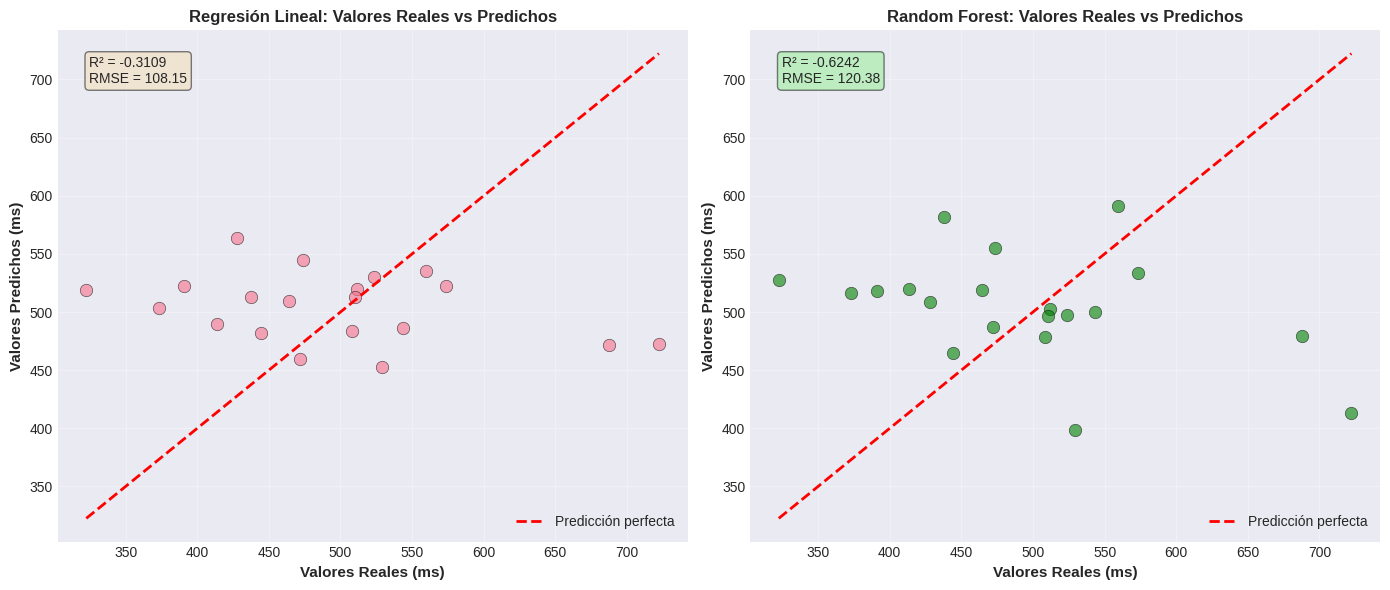

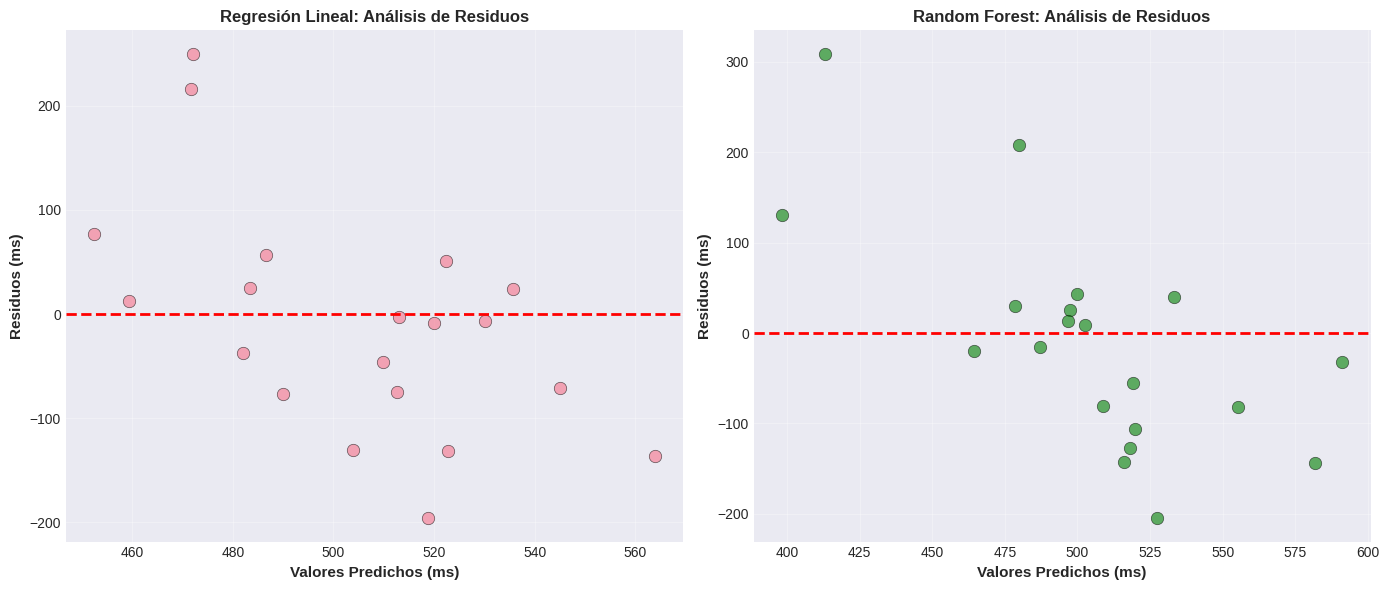

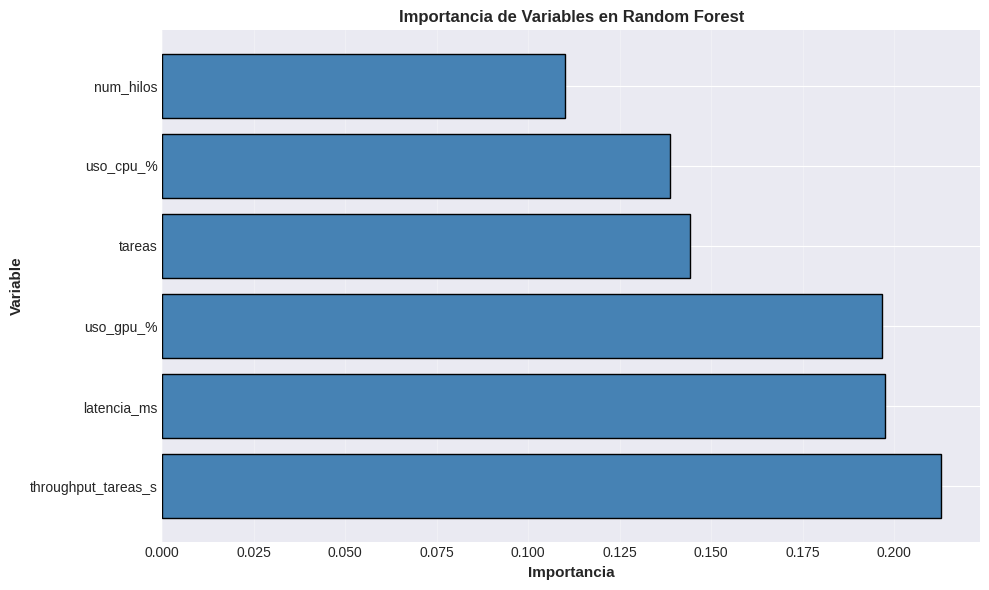

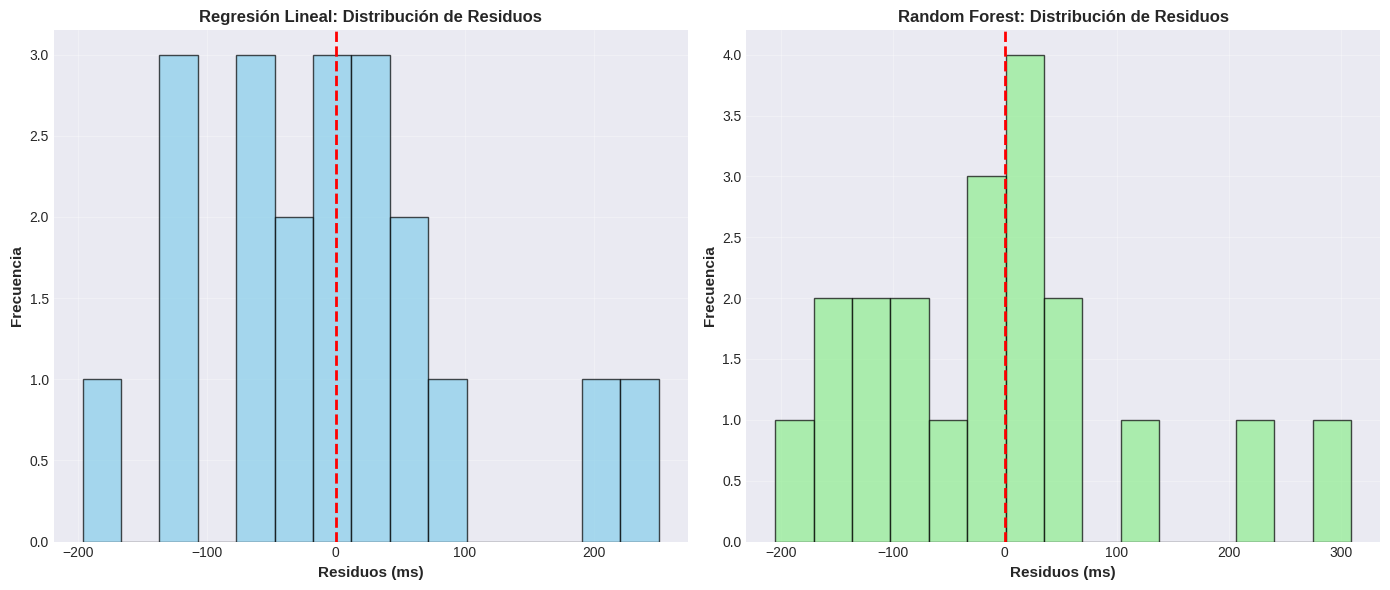



5. ANÁLISIS DE ERROR PORCENTUAL
--------------------------------------------------------------------------------

Regresión Lineal:
  Error porcentual promedio: 17.27%
  Error porcentual mediano:  12.46%
  Error porcentual máximo:   60.82%

Random Forest:
  Error porcentual promedio: 19.12%
  Error porcentual mediano:  14.55%
  Error porcentual máximo:   63.54%


In [10]:

"""
Modelado Predictivo de Rendimiento en Sistemas Paralelos
MIA102 - Programación Paralela
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# Cargar datos
df = pd.read_csv('datos_sinteticos_rendimiento.csv')
print("="*80)
print("MODELADO PREDICTIVO DE RENDIMIENTO EN SISTEMAS PARALELOS")
print("="*80)

# Preparación de datos
print("\n1. PREPARACIÓN DE DATOS")
print("-"*80)

# Variable objetivo y características
X = df.drop('tiempo_ejecucion_ms', axis=1)
y = df['tiempo_ejecucion_ms']
print(f"Variables predictoras: {list(X.columns)}")
print(f"Variable objetivo: tiempo_ejecucion_ms")
print(f"\nDimensiones:")
print(f"  X: {X.shape}")
print(f"  y: {y.shape}")

# División de datos: 80% entrenamiento, 20% prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(f"\nConjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Conjunto de prueba: {X_test.shape[0]} muestras")

# Modelo 1: Regresión Lineal Múltiple
print("\n\n2. MODELO 1: REGRESIÓN LINEAL MÚLTIPLE")
print("-"*80)

# Entrenar modelo
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicciones
y_pred_train_lr = lr_model.predict(X_train)
y_pred_test_lr = lr_model.predict(X_test)

# Métricas
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_test_lr)
rmse_train_lr = np.sqrt(mse_train_lr)
rmse_test_lr = np.sqrt(mse_test_lr)
r2_train_lr = r2_score(y_train, y_pred_train_lr)
r2_test_lr = r2_score(y_test, y_pred_test_lr)
mae_test_lr = mean_absolute_error(y_test, y_pred_test_lr)
print(f"\nMétricas de Entrenamiento:")
print(f"  MSE:  {mse_train_lr:.2f}")
print(f"  RMSE: {rmse_train_lr:.2f}")
print(f"  R²:   {r2_train_lr:.4f}")
print(f"\nMétricas de Prueba:")
print(f"  MSE:  {mse_test_lr:.2f}")
print(f"  RMSE: {rmse_test_lr:.2f}")
print(f"  MAE:  {mae_test_lr:.2f}")
print(f"  R²:   {r2_test_lr:.4f}")

# Coeficientes del modelo
print(f"\nCoeficientes del modelo:")
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': lr_model.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)
print(coef_df.to_string(index=False))
print(f"\nIntercepto: {lr_model.intercept_:.2f}")

# Guardar coeficientes
coef_df.to_csv('coeficientes_regresion_lineal.csv', index=False)

# Validación cruzada
cv_scores_lr = cross_val_score(lr_model, X, y, cv=5,
                               scoring='neg_mean_squared_error')
cv_rmse_lr = np.sqrt(-cv_scores_lr)
print(f"\nValidación Cruzada (5-fold):")
print(f"  RMSE promedio: {cv_rmse_lr.mean():.2f} ± {cv_rmse_lr.std():.2f}")

# Modelo 2: Random Forest Regressor
print("\n\n3. MODELO 2: RANDOM FOREST REGRESSOR")
print("-"*80)

# Entrenar modelo
rf_model = RandomForestRegressor(n_estimators=100, random_state=42,
                                 max_depth=10, min_samples_split=5)
rf_model.fit(X_train, y_train)

# Predicciones
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

# Métricas
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)
rmse_train_rf = np.sqrt(mse_train_rf)
rmse_test_rf = np.sqrt(mse_test_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)
mae_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
print(f"\nMétricas de Entrenamiento:")
print(f"  MSE:  {mse_train_rf:.2f}")
print(f"  RMSE: {rmse_train_rf:.2f}")
print(f"  R²:   {r2_train_rf:.4f}")
print(f"\nMétricas de Prueba:")
print(f"  MSE:  {mse_test_rf:.2f}")
print(f"  RMSE: {rmse_test_rf:.2f}")
print(f"  MAE:  {mae_test_rf:.2f}")
print(f"  R²:   {r2_test_rf:.4f}")

# Importancia de características
feature_importance = pd.DataFrame({
    'Variable': X.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values('Importancia', ascending=False)
print(f"\nImportancia de Variables:")
print(feature_importance.to_string(index=False))

# Guardar importancia
feature_importance.to_csv('importancia_variables_rf.csv', index=False)

# Validación cruzada
cv_scores_rf = cross_val_score(rf_model, X, y, cv=5,
                               scoring='neg_mean_squared_error')
cv_rmse_rf = np.sqrt(-cv_scores_rf)
print(f"\nValidación Cruzada (5-fold):")
print(f"  RMSE promedio: {cv_rmse_rf.mean():.2f} ± {cv_rmse_rf.std():.2f}")

# Comparación de modelos
print("\n\n4. COMPARACIÓN DE MODELOS")
print("-"*80)
comparison_df = pd.DataFrame({
    'Modelo': ['Regresión Lineal', 'Random Forest'],
    'MSE_Test': [mse_test_lr, mse_test_rf],
    'RMSE_Test': [rmse_test_lr, rmse_test_rf],
    'MAE_Test': [mae_test_lr, mae_test_rf],
    'R²_Test': [r2_test_lr, r2_test_rf],
    'CV_RMSE_Mean': [cv_rmse_lr.mean(), cv_rmse_rf.mean()],
    'CV_RMSE_Std': [cv_rmse_lr.std(), cv_rmse_rf.std()]
})
print(comparison_df.to_string(index=False))
comparison_df.to_csv('comparacion_modelos.csv', index=False)

# Determinar mejor modelo
best_model_name = 'Random Forest' if r2_test_rf > r2_test_lr else 'Regresión Lineal'
best_model = rf_model if r2_test_rf > r2_test_lr else lr_model
y_pred_test_best = y_pred_test_rf if r2_test_rf > r2_test_lr else y_pred_test_lr
print(f"\nMejor modelo: {best_model_name}")

# Valores reales vs predichos (Regresión Lineal)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Regresión Lineal
axes[0].scatter(y_test, y_pred_test_lr, alpha=0.6, s=80, edgecolors='k', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Predicción perfecta')
axes[0].set_xlabel('Valores Reales (ms)', fontweight='bold', fontsize=11)
axes[0].set_ylabel('Valores Predichos (ms)', fontweight='bold', fontsize=11)
axes[0].set_title('Regresión Lineal: Valores Reales vs Predichos',
                  fontweight='bold', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].text(0.05, 0.95, f'R² = {r2_test_lr:.4f}\nRMSE = {rmse_test_lr:.2f}',
            transform=axes[0].transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Random Forest
axes[1].scatter(y_test, y_pred_test_rf, alpha=0.6, s=80, edgecolors='k', linewidth=0.5, color='green')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             'r--', lw=2, label='Predicción perfecta')
axes[1].set_xlabel('Valores Reales (ms)', fontweight='bold', fontsize=11)
axes[1].set_ylabel('Valores Predichos (ms)', fontweight='bold', fontsize=11)
axes[1].set_title('Random Forest: Valores Reales vs Predichos',
                  fontweight='bold', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].text(0.05, 0.95, f'R² = {r2_test_rf:.4f}\nRMSE = {rmse_test_rf:.2f}',
            transform=axes[1].transAxes, fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.5))
plt.tight_layout()
plt.show()
plt.close()

# Residuos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
residuals_lr = y_test - y_pred_test_lr
residuals_rf = y_test - y_pred_test_rf

# Regresión Lineal
axes[0].scatter(y_pred_test_lr, residuals_lr, alpha=0.6, s=80, edgecolors='k', linewidth=0.5)
axes[0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Valores Predichos (ms)', fontweight='bold', fontsize=11)
axes[0].set_ylabel('Residuos (ms)', fontweight='bold', fontsize=11)
axes[0].set_title('Regresión Lineal: Análisis de Residuos', fontweight='bold', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Random Forest
axes[1].scatter(y_pred_test_rf, residuals_rf, alpha=0.6, s=80,
                edgecolors='k', linewidth=0.5, color='green')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Valores Predichos (ms)', fontweight='bold', fontsize=11)
axes[1].set_ylabel('Residuos (ms)', fontweight='bold', fontsize=11)
axes[1].set_title('Random Forest: Análisis de Residuos', fontweight='bold', fontsize=12)
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

# Importancia de variables (Random Forest)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Variable'], feature_importance['Importancia'],
         color='steelblue', edgecolor='black')
plt.xlabel('Importancia', fontweight='bold', fontsize=11)
plt.ylabel('Variable', fontweight='bold', fontsize=11)
plt.title('Importancia de Variables en Random Forest', fontweight='bold', fontsize=12)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()
plt.close()

#  Distribución de errores
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Regresión Lineal
axes[0].hist(residuals_lr, bins=15, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[0].set_xlabel('Residuos (ms)', fontweight='bold', fontsize=11)
axes[0].set_ylabel('Frecuencia', fontweight='bold', fontsize=11)
axes[0].set_title('Regresión Lineal: Distribución de Residuos',
                  fontweight='bold', fontsize=12)
axes[0].grid(True, alpha=0.3)

# Random Forest
axes[1].hist(residuals_rf, bins=15, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Residuos (ms)', fontweight='bold', fontsize=11)
axes[1].set_ylabel('Frecuencia', fontweight='bold', fontsize=11)
axes[1].set_title('Random Forest: Distribución de Residuos',
                  fontweight='bold', fontsize=12)
axes[1].grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
plt.close()

# Error porcentual
error_porcentual_lr = np.abs((y_test - y_pred_test_lr) / y_test) * 100
error_porcentual_rf = np.abs((y_test - y_pred_test_rf) / y_test) * 100
print(f"\n\n5. ANÁLISIS DE ERROR PORCENTUAL")
print("-"*80)
print(f"\nRegresión Lineal:")
print(f"  Error porcentual promedio: {error_porcentual_lr.mean():.2f}%")
print(f"  Error porcentual mediano:  {error_porcentual_lr.median():.2f}%")
print(f"  Error porcentual máximo:   {error_porcentual_lr.max():.2f}%")
print(f"\nRandom Forest:")
print(f"  Error porcentual promedio: {error_porcentual_rf.mean():.2f}%")
print(f"  Error porcentual mediano:  {error_porcentual_rf.median():.2f}%")
print(f"  Error porcentual máximo:   {error_porcentual_rf.max():.2f}%")

# Guardar resultados de predicción
resultados_test = pd.DataFrame({
    'Valor_Real': y_test.values,
    'Prediccion_LR': y_pred_test_lr,
    'Prediccion_RF': y_pred_test_rf,
    'Error_LR': residuals_lr.values,
    'Error_RF': residuals_rf.values,
    'Error_Porcentual_LR': error_porcentual_lr.values,
    'Error_Porcentual_RF': error_porcentual_rf.values
})
resultados_test.to_csv('resultados_prediccion.csv', index=False)
